## **Cats Dogs Detection**

**Benedictus Bayu Pramudhito**

Fix slow training on Google Colab: https://medium.com/datadriveninvestor/speed-up-your-image-training-on-google-colab-dc95ea1491cf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = '/content/drive/My\ Drive/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

# Baseline CNN model



In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


In [9]:
dataset_dir = '/content/'

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [10]:
history_base_model = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
100/100 [==============================] - 45s 448ms/step - loss: 0.7611 - accuracy: 0.5367 - val_loss: 0.6790 - val_accuracy: 0.5488
Epoch 2/75
100/100 [==============================] - 44s 442ms/step - loss: 0.6745 - accuracy: 0.5732 - val_loss: 0.6381 - val_accuracy: 0.6501
Epoch 3/75
100/100 [==============================] - 44s 435ms/step - loss: 0.6507 - accuracy: 0.6129 - val_loss: 0.6298 - val_accuracy: 0.6390
Epoch 4/75
100/100 [==============================] - 44s 436ms/step - loss: 0.6332 - accuracy: 0.6316 - val_loss: 0.6179 - val_accuracy: 0.6616
Epoch 5/75
100/100 [==============================] - 43s 433ms/step - loss: 0.6243 - accuracy: 0.6435 - val_loss: 0.6280 - val_accuracy: 0.6292
Epoch 6/75
100/100 [==============================] - 43s 432ms/step - loss: 0.6163 - accuracy: 0.6488 - val_loss: 0.6116 - val_accuracy: 0.6523
Epoch 7/75
100/100 [==============================] - 

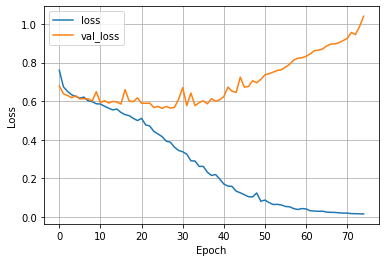

In [11]:
plot_loss(history_base_model)

**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Berdasarkan grafik epoch terhadap loss pada model Baseline CNN tanpa image augmentation, terlihat bahwa garis lossnya terus menurun dengan 100 epoch. Akan tetapi garis val_lossnya terus mengalami peningkatan. Terlihat juga bahwa perbedaan jarak antara loss dan val_lossnya setelah epoch 10 terus mengalami peningkatan sehingga setelah epoch 10 model kita semakin overfit. Nilai val_loss terendah diperoleh saat epochnya sekitar 27-28, dimana pada epoch 28 diperoleh val_loss: 0.5643 dan val_accuracy: 0.7211

### **Image Augmentation**

https://keras.io/api/preprocessing/image/

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/


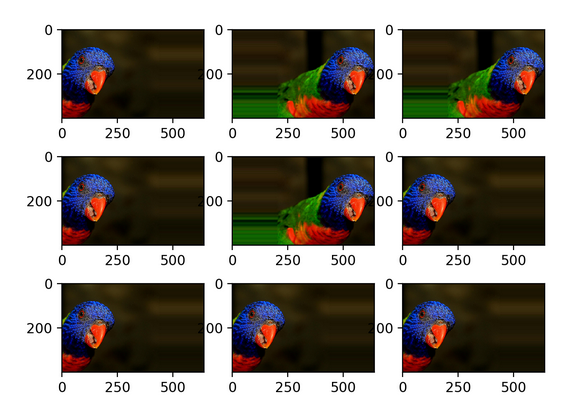

In [9]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [11]:
dataset_dir = '/content/'

train_augmented_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_augmented_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [13]:
model_aug = Sequential([Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)),
                   MaxPooling2D((2,2)),
                   Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'),
                   MaxPooling2D((2,2)),
                   Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform'),
                   MaxPooling2D((2,2)), 
                   Flatten(),
                   Dense(128, activation='relu', kernel_initializer='he_uniform'),
                   Dense(1, activation='sigmoid')
])

In [14]:
model_aug.compile(optimizer=SGD(lr=0.001, momentum=0.9), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model_aug.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0

In [15]:
history_deepaug_model = model_aug.fit_generator(train_augmented_iterator, steps_per_epoch=len(train_augmented_iterator), validation_data=test_augmented_iterator, validation_steps=len(test_augmented_iterator), epochs=75)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
100/100 [==============================] - 151s 2s/step - loss: 0.7198 - accuracy: 0.5380 - val_loss: 0.6785 - val_accuracy: 0.5613
Epoch 2/75
100/100 [==============================] - 148s 1s/step - loss: 0.6707 - accuracy: 0.5917 - val_loss: 0.6489 - val_accuracy: 0.6350
Epoch 3/75
100/100 [==============================] - 148s 1s/step - loss: 0.6510 - accuracy: 0.6162 - val_loss: 0.6299 - val_accuracy: 0.6479
Epoch 4/75
100/100 [==============================] - 147s 1s/step - loss: 0.6383 - accuracy: 0.6348 - val_loss: 0.6257 - val_accuracy: 0.6408
Epoch 5/75
100/100 [==============================] - 148s 1s/step - loss: 0.6207 - accuracy: 0.6568 - val_loss: 0.6134 - val_accuracy: 0.6559
Epoch 6/75
100/100 [==============================] - 147s 1s/step - loss: 0.6196 - accuracy: 0.6521 - val_loss: 0.6060 - val_accuracy: 0.6763
Epoch 7/75
100/100 [==============================] - 150s 2s/step

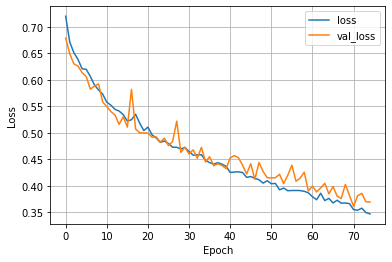

In [16]:
plot_loss(history_deepaug_model)

**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Berdasarkan grafik epoch terhadap loss pada model CNN dengan deeper layer dan image augmentation, terlihat bahwa garis loss dan val_loss nya terus menurun dengan 100 epoch. Terlihat juga bahwa perbedaan jarak antara loss dan val_lossnya dengan 100 epoch ini tidak besar yang berarti model yang kita buat ini tidak overfit. Oleh karena itu, nilai val_loss terendah diperoleh saat epochnya sekitar 70, dimana diperoleh val_loss: 0.3818 dan val_accuracy: 0.8290

Hasil akurasi model Baseline CNN tanpa image augmentation adalah sebesar 0.7211 sedangkan hasil akurasi model CNN dengan deeper layer dan image augmentation lebih baik yakni sebesar 0.8290. Hal ini karena tujuan pemberian dari image augmentation itu sendiri untuk memberikan variasi lebih terhadap data supaya model lebih general (tidak overfit)